# House Sale Predictions

In this project we will analyze data regarding the sale of homes in a specific area in Seattle sold between May 2014 and May 2015 in order to predict the price as a dependent variable of other homes as numerical values by applying a regression model taking into consideration certain features or independent variables such as:
- Square footage
- Number of bedrooms
- Number of floors

## Library imports

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn import linear_model
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [210]:
df = pd.read_csv('kc_house_data_NaN.csv')

In [212]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Preparation

In [215]:
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [217]:
# Columns of the dataframe
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [219]:
# Drop the Unamed and id columns
df.drop(['id', 'Unnamed: 0'], axis = 1, inplace = True)

In [221]:
# Statistical summary of the dataframe
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [223]:
# Number of the missing values
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [225]:
# Replacement of missing values of the bedrooms and bathrooms columns with the mean value
bed_mean = df['bedrooms'].mean()
bath_mean = df['bathrooms'].mean()

#df['bedrooms'].replace(np.nan, bed_mean, inplace = True)
#df['bathrooms'].replace(np.nan, bath_mean, inplace = True)

df['bedrooms'] = df['bedrooms'].fillna(bed_mean)
df['bathrooms'] = df['bedrooms'].fillna(bed_mean)

print('bedrooms missing values:', df['bedrooms'].isnull().sum()) 
print('bathrooms missing values:', df['bathrooms'].isnull().sum()) 

bedrooms missing values: 0
bathrooms missing values: 0


## Exploratory Data Analysis (EDA)

In [228]:
# Number of floors per house count
df['floors'].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

Text(0.5, 1.0, 'Price vs Floors')

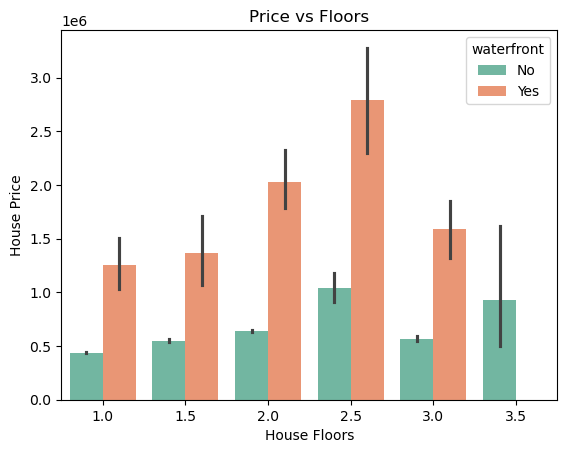

In [230]:
# bar chart between house price versus number of floors with and without waterfront
df['waterfront'] = df['waterfront'].map({0 : 'No', 1: 'Yes'})
sns.barplot(data = df, x = 'floors', y = 'price', hue= 'waterfront', palette='Set2')
plt.ylabel('House Price')
plt.xlabel('House Floors')
plt.title('Price vs Floors')

Text(0.5, 1.0, 'Sqft Above - Price Correlation')

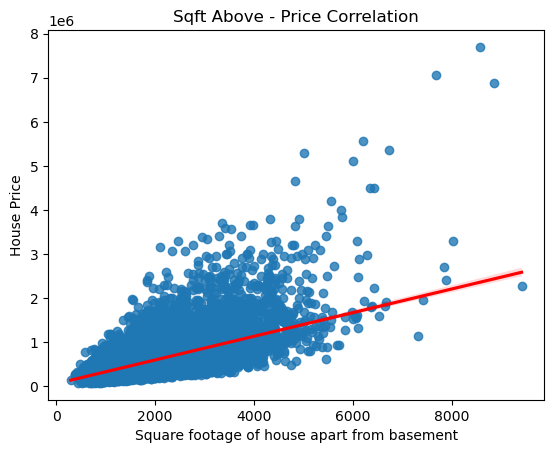

In [232]:
# linear regression graph of sqft_above and price
sns.regplot(data = df, x = 'sqft_above', y = 'price',line_kws = {'color': 'red'})
plt.xlabel('Square footage of house apart from basement')
plt.ylabel('House Price')
plt.title('Sqft Above - Price Correlation')

## Model Development

### <font color = blue> Simple Linear Regression </font>

In [245]:
# Person correlation
corr, p_value = pearsonr(df['price'], df['sqft_living'])
print(f'Pearson Coefficient: {corr:.3f}')
# Direct method
print(df['price'].corr(df['sqft_living']))
print(f'P Value: {p_value:.10f}')


Pearson Coefficient: 0.702
0.7020350546118004
P Value: 0.0000000000


In [252]:
# Data preparation
X = df[['sqft_living']]  # Independent variable
y = df[['price']]        # Dependent variable

# Data division, training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model construction
r_model = LinearRegression()

# Model training
r_model.fit(X_train, y_train)

print ('Coefficients: ', r_model.coef_[0])
print ('Intercept: ', r_model.intercept_)

Coefficients:  [279.55477932]
Intercept:  [-41999.18603994]


The coefficient of the line, determine how much the dependent variable Y ‘price’ changes for each increase of the independent variable X ‘sqft_living’ by 1.
- For each unit unit of 'sqft_living', 'price' increases 279.55477932.

Intercept of the line, determine what is the value of the dependent variable 'Price' when the independent variable 'sqft_living' is 0.

#### Model Evaluation

In [260]:
y_pred = r_model.predict(X_test)

sr_score = r_model.score(X_test, y_test)
print(f'R² test data score: {sr_score:.2f}')

R² test data score: 0.49


Text(0.5, 1.0, 'Simple Linear Regression: Price vs Sqft Living')

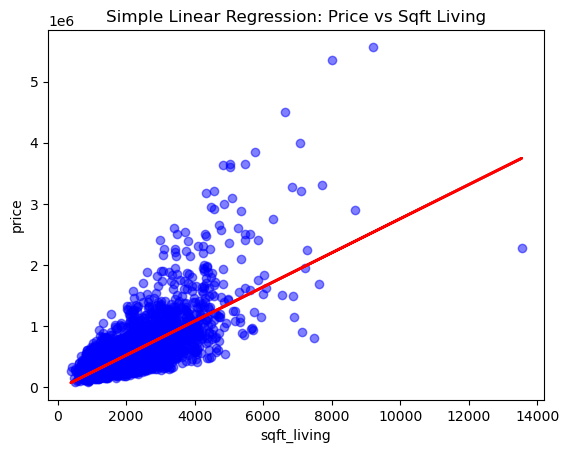

In [262]:
# Test Data - sqft_living
plt.scatter(X_test, y_test,  color='blue', alpha=0.5)
# Regression Line
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title('Simple Linear Regression: Price vs Sqft Living')

### <font color = blue> Multiple Linear Regression </font>

In [265]:
# Selection of the numerical columns of the dataframe
df_numeric = df.select_dtypes(include=['number'])

# The correlation between price and the numerical columns of the datafile is calculated
correlation_with_price = df_numeric.corr()['price'].sort_values(ascending=False)
print(correlation_with_price)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
view             0.397293
sqft_basement    0.323816
bathrooms        0.308797
bedrooms         0.308797
lat              0.307003
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


In [267]:
df_numeric = df_numeric.drop(['price'], axis = 1)

#### Data Standardization

In [270]:
# Standardization of the independent variables so that the values have a similar scale
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(df_numeric)

In [272]:
pd.DataFrame(X_std).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.56,-2.56,-1.95,-0.35,-0.92,-0.31,-3.70,-5.66,-1.81,-0.66,-2.42,-0.21,-1.44,-2.92,-2.17,-2.32,-0.44
25%,-0.40,-0.40,-0.71,-0.24,-0.92,-0.31,-0.63,-0.56,-0.72,-0.66,-0.68,-0.21,-0.84,-0.64,-0.81,-0.72,-0.28
50%,-0.40,-0.40,-0.18,-0.18,0.01,-0.31,-0.63,-0.56,-0.28,-0.66,0.14,-0.21,-0.24,0.08,-0.11,-0.21,-0.19
75%,0.68,0.68,0.51,-0.11,0.94,-0.31,0.91,0.29,0.51,0.61,0.88,-0.21,0.75,0.85,0.63,0.54,-0.10
max,31.98,31.98,12.48,39.50,3.71,4.91,2.44,4.55,9.20,10.23,1.50,4.81,2.26,1.57,6.38,6.16,31.44


We can see that the std(standard deviation) is 1 and the mean is 0.

In [275]:
X = X_std
y = df[['price']]

# Data division, training and test
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

# Model construction
r_model = LinearRegression()

# Model training
r_model.fit(X_train, y_train)

print ('Coefficients: ', r_model.coef_[0])
print ('Intercept: ', r_model.intercept_)

Coefficients:  [-14753.01142591 -14753.01142591  91262.45650724   3408.16420677
  11091.66526639  60552.61474065  17635.18269745 111519.04459264
  83566.53415663  33030.51017976 -68707.53194582  13293.23011118
 -31077.18864126  82478.24629427 -29043.84492055  11022.81901217
  -8993.56425718]
Intercept:  [539276.82135627]


#### Model Evaluation

In [278]:
y_pred = r_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mr_score = r2_score(y_test, y_pred)

print(f'Mean absolute error: {mae:.4f}')
print(f'Mean squared error: {mse:.4f}')
print(f'Root mean squared error: {rmse:.4f}')
print(f'R² test data score: {mr_score:.4f}')

Mean absolute error: 129968.9492
Mean squared error: 48199411977.8944
Root mean squared error: 219543.6448
R² test data score: 0.6812


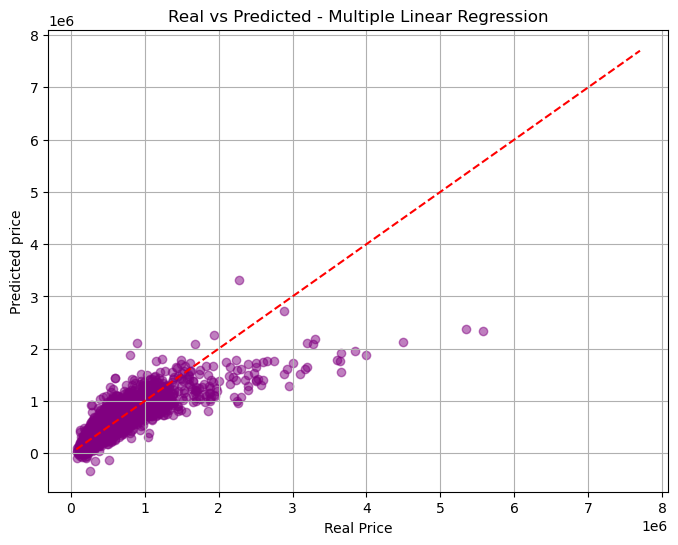

In [280]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # línea ideal
plt.xlabel('Real Price')
plt.ylabel('Predicted price')
plt.title('Real vs Predicted - Multiple Linear Regression')
plt.grid(True)
plt.show()

### <font color = blue> XGB Regressor </font>

In [283]:
!pip install xgboost --quiet
import xgboost
from xgboost import XGBRegressor
print(xgboost.__version__)

3.0.2


In [285]:
# Data Preparation
X = df.select_dtypes(include = ['number'])
y = df['price']

# Data division, training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model construction
xgb_model = XGBRegressor(n_estimators = 200, learning_rate = 0.05, max_depth = 4, random_state = 42, objective='reg:squarederror')

# Model training
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

#### Model Evaluation

In [288]:
xgb_y_predict = xgb_model.predict(X_test)

xgb_mse_score = mean_squared_error(y_test, xgb_y_predict)
xgb_rmse = np.sqrt(xgb_mse_score)
xgb_r2_score = xgb_model.score(X_test,y_test)

print('MSE score : {0:.3f}'.format(xgb_mse_score))
print('RMSE score : {0:.3f}'.format(xgb_rmse))
print('R^2 score : {0:.3f}'.format(xgb_r2_score))

MSE score : 4777018077.373
RMSE score : 69115.976
R^2 score : 0.967


In [290]:
results = {'ML Model' : ['Simple Linear Regresion', 'Multiple Linear Regression', 'XGBoost'],
      'R² Score:': [sr_score, mr_score, xgb_r2_score]}
r2_results = pd.DataFrame(results)
r2_results

,ML Model,R² Score:
0,Simple Linear Regresion,0.494069
1,Multiple Linear Regression,0.681172
2,XGBoost,0.966910


## Conclusion

The simple linear regression model predicts 49% of the test cases, the multiple linear regression model predicts 68% of the cases, it works well, but not perfectly and finally the XGBoost model predicts 96% of the test cases, so it is a very efficient model for predicting house prices.